In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
s

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/sms_spam.csv')
data.shape

(5574, 2)

In [ ]:
data.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.describe()

,type,text
count,5574,5574
unique,2,5160
top,ham,"Sorry, I'll call later"
freq,4827,30


In [ ]:
data.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4827   4518                             Sorry, I'll call later   30
spam   747    642  Please call our customer service representativ...    4

In [ ]:
data['length'] = data['text'].apply(len)
data.head(10)

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


<Axes: xlabel='length'>

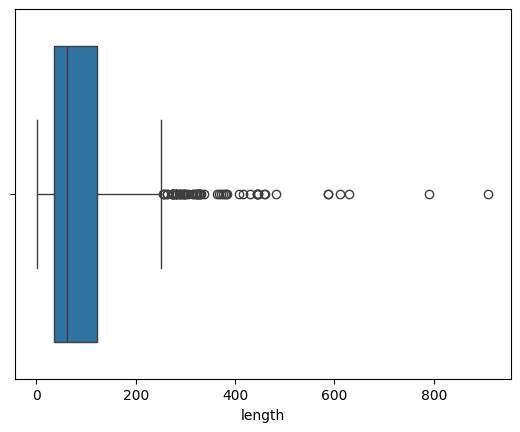

In [ ]:
sns.boxplot(data['length'], orient='h')

In [ ]:
data['length'].describe()

count    5574.000000
mean       80.444923
std        59.841828
min         2.000000
25%        36.000000
50%        61.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [ ]:
data[data['length'] == 910]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Text Preprocessing

In [ ]:
import string
message = 'This is a sample message.....#$.....'
no_punc = [i for i in message if i not in string.punctuation]
out_message = ''.join(no_punc)
print(out_message)

This is a sample message


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
def text_process(mess):
    no_punc = [i for i in  mess  if i not in string.punctuation]
    out_message = ''.join(no_punc)
    return [word for word in out_message.split() if word.lower() not in stopwords.words('english')]

In [ ]:
data['text'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

In [ ]:
data.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Feature Engineering - TFIDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
bow = CountVectorizer(analyzer=text_process).fit(data['text'])
print(len(bow.vocabulary_))

11401


In [ ]:
data.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
message_bow = bow.transform(data['text'])

In [ ]:
message_bow

<5574x11401 sparse matrix of type '<class 'numpy.int64'>'
	with 50544 stored elements in Compressed Sparse Row format>

In [ ]:
message_tfidf = TfidfTransformer().fit(message_bow).transform(message_bow)

In [ ]:
message_tfidf.shape

(5574, 11401)

ML Algo - Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_model = MultinomialNB().fit(message_tfidf, data['type'])

In [ ]:
predictions = spam_model.predict(message_tfidf)
predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(data['type'], predictions))

[[4827    0]
 [ 115  632]]
